# Pymaceuticals Inc.
---

### Analysis

The principal findings are:

•	Ramicane and Capomulin have the smallest mean tumor volume compared to the other groups, and they even worked better compared to the placebo group.

•	These two drugs had the smallest standard deviation of all the treatments in the study meaning their distributions are not widely dispersed.

•	The bar chart shows that Capomulin and Ramicane are the drugs with most timepoints observed in the mice in contrast to the rest of the groups. They both surpassed 200 timepoints.

•	The distribution of female and male mice is almost equal, 49.6% and 50.4% respectively. It is important to identify in the medical literature which sex is most affected by the SCC in order to reconsider the structure of the distribution.

•	The only treatment that has outliers is Infunibol. The distributions of Capomulin and Ramicane show that they have the least final tumor volume, and their data is not widespread.

•	Mouse ID l509 timepoints showed the tumor volume decreased in the first 35 days, until it began to increase in size. This mouse was in the Capomulin group.

•	The correlation coefficient between mouse weight and average tumor volume is 0.84 (strong relationship). However, it could be because there is collinearity between the variables: the weight of the mouse is influenced by the volume of the tumor, and vice versa.

•	The line of regression shows a positive relation: a bigger mouse in weight (g) has a bigger tumor volume (mm3). This could also be the result of collinearity.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates['Mouse ID'].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse = merge_df.loc[merge_df['Mouse ID'] == "g989", :]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Mouse ID'] == "g989"].index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
variance = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
st_dev = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
std_err = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

statistics_summary = pd.concat([mean.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"}), 
                                median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"}), 
                                variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"}), 
                                st_dev.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev"}), 
                                std_err.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})], axis=1)
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

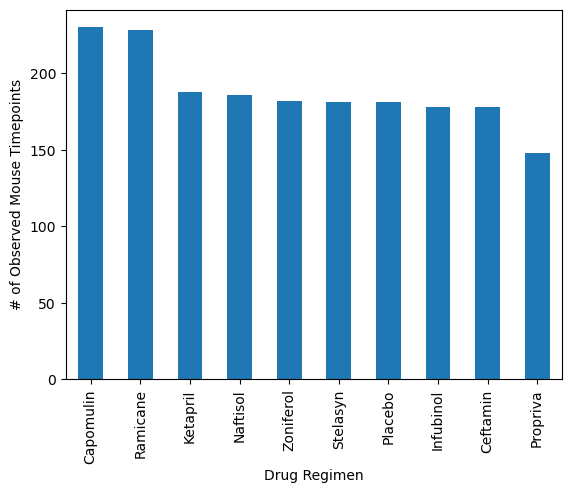

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_df["Drug Regimen"].value_counts().plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

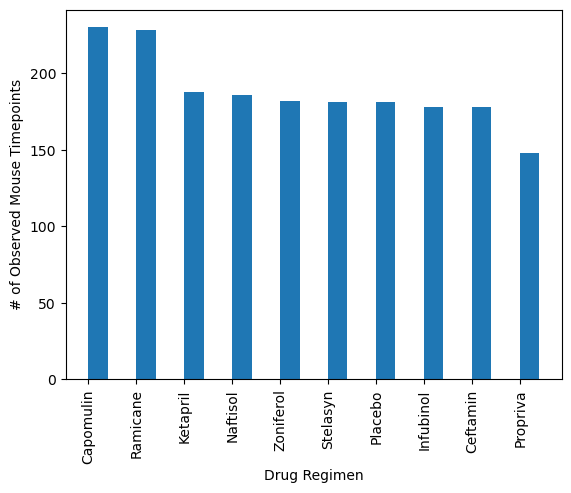

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
observed_m_timepoints = cleaned_df["Drug Regimen"].value_counts()

plt.bar(observed_m_timepoints.index, observed_m_timepoints.values, width = 0.4, align = "edge")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

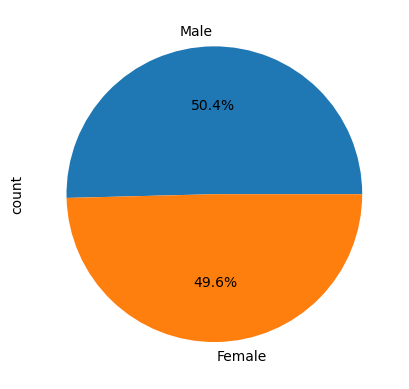

In [10]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex = cleaned_df[["Mouse ID", "Sex"]]
mouse_sex = mouse_sex.drop_duplicates()
sex_counts = mouse_sex['Sex'].value_counts()

# Make the pie chart
sex_counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

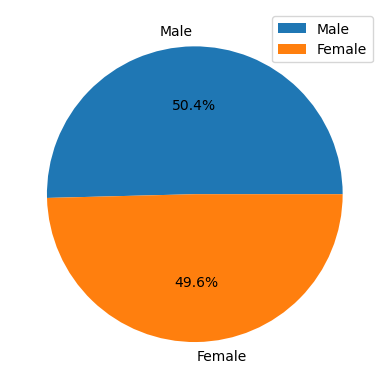

In [11]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex = cleaned_df[["Mouse ID", "Sex"]]
mouse_sex = mouse_sex.drop_duplicates()

# Make the pie chart
labels = ["Male", "Female"]
explode = (0, 0)
plt.pie(mouse_sex["Sex"].value_counts(), labels = labels, autopct='%.1f%%')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_great_timepoint = pd.merge(greatest_timepoint, cleaned_df, on = ["Mouse ID", "Timepoint"])
mice_great_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {"Capomulin": [], "Ramicane": [], "Infubinol": [], "Ceftamin": []}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
         
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = mice_great_timepoint.loc[mice_great_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
        
    # add subset
    tumor_volumes[drug].extend(subset) 

tumor_volumes = pd.DataFrame(tumor_volumes)
tumor_volumes

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [14]:
# Determine outliers using upper and lower bounds
quartiles_data = {"treatment": [], "lower_q": [], "median": [], "upper_q": [], "iqr": [], 
                  "lower_bound": [], "upper_bound": []}

for drug in treatment:
    quartiles = tumor_volumes[drug].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_b = lowerq - (1.5 * iqr) 
    upper_b = upperq + (1.5 * iqr)

    quartiles_data["treatment"].append(drug)
    quartiles_data["lower_q"].append(lowerq)
    quartiles_data["median"].append(median)
    quartiles_data["upper_q"].append(upperq)
    quartiles_data["iqr"].append(iqr)
    quartiles_data["lower_bound"].append(lower_b)
    quartiles_data["upper_bound"].append(upper_b)

quartiles_treatment = pd.DataFrame(quartiles_data)
quartiles_treatment

,treatment,lower_q,median,upper_q,iqr,lower_bound,upper_bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


In [15]:
for drug in treatment:
    lower_b = quartiles_treatment.loc[quartiles_treatment["treatment"] == drug, "lower_bound"].values[0]
    upper_b = quartiles_treatment.loc[quartiles_treatment["treatment"] == drug, "upper_bound"].values[0]

    outliers = tumor_volumes.loc[(tumor_volumes[drug] > upper_b) | (tumor_volumes[drug] < lower_b), drug]
        
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


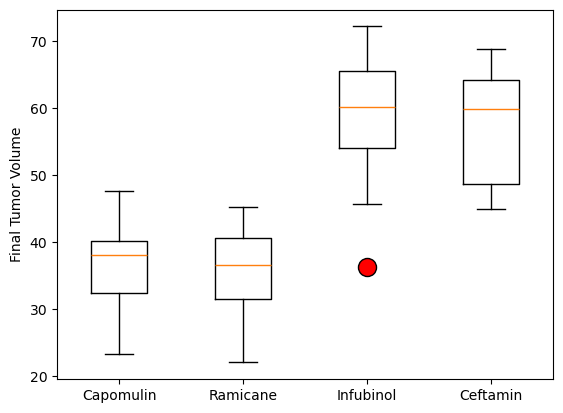

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
flierprops = dict(marker='o', markerfacecolor='red', markersize=13)

fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume")
ax.boxplot(tumor_volumes, labels = labels, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

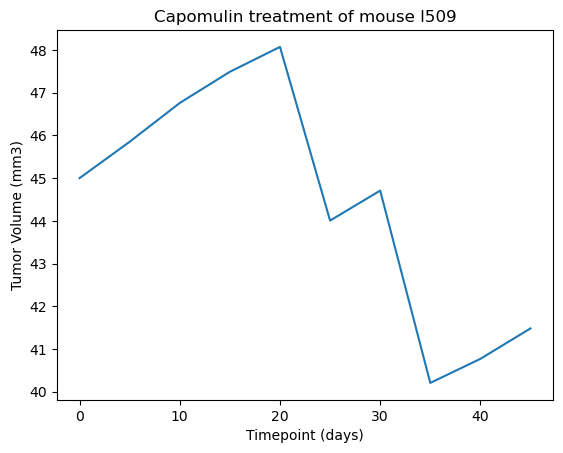

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
observed_mouse = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509", ["Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
observed_mouse

plt.plot(observed_mouse["Timepoint"], observed_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

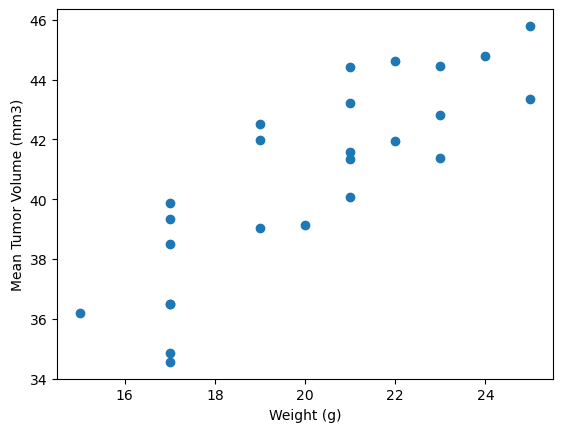

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treated = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

tumor_vol_avg = pd.DataFrame(capomulin_treated.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

scatter_data = pd.merge(tumor_vol_avg, capomulin_treated, on = 'Mouse ID')
scatter_data = scatter_data.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Tumor Volume (mm3)"})
scatter_data = scatter_data.drop_duplicates(subset=['Mouse ID', 'Mean Tumor Volume'])

plt.scatter(scatter_data["Weight (g)"], scatter_data["Mean Tumor Volume"], marker = 'o')
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


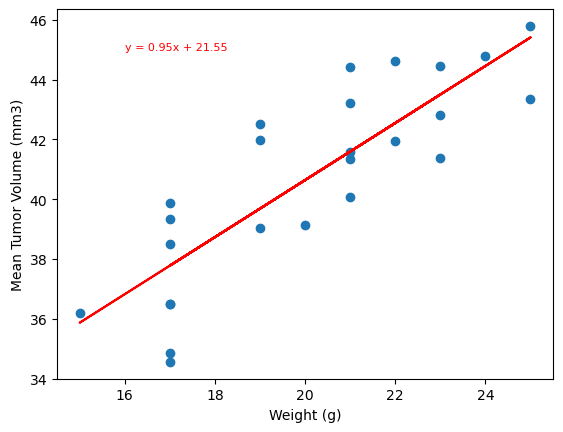

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_data["Weight (g)"], scatter_data["Mean Tumor Volume"])
print(f'The correlation between mouse weight and the average tumor volume is: {round(correlation[0], 2)}')

x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Mean Tumor Volume"]
st.linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(scatter_data["Weight (g)"], scatter_data["Mean Tumor Volume"], marker = 'o')
plt.plot(x_values, regress, color="red")
plt.annotate(line_eq, (16, 45), fontsize = 8, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.show()
